In [98]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import pickle
import torch.utils.data as data_utils
import torch.nn as nn
import torchsummary


class NN_dragon(nn.Module):
    def __init__(self, in_features, out_features, dropouts, activates):
        super(NN_dragon, self).__init__()
#         self.float()

        layers = []
        for i, out_feat in enumerate(out_features):
            layers.append(nn.Linear(in_features, out_feat))
            layers.append(nn.BatchNorm1d(out_feat, affine=False))
            activate_name = activates[i]
            activate = getattr(nn, activate_name)()
            layers.append(activate)
            # layers.append(nn.Dropout(dropouts[i]))
            in_features = out_feat
        layers.append(nn.Linear(in_features, 1))
        self.features = nn.Sequential(*layers)

    def forward(self, x_input):
        output = self.features(x_input)

        return output

def get_model(in_features, nn_params, model_type='NN'):

    if model_type == 'NN':
        n_layers = nn_params['n_layers']
        out_features = [nn_params[f'n_units_l{n}'] for n in range(n_layers)]
        dropouts = [] #[nn_params[f'dropout_l{n}'] for n in range(n_layers)]
        activates = [nn_params[f'activate_l{n}'] for n in range(n_layers)]

        model = NN_dragon(in_features, out_features, dropouts, activates)


    return model

def lag_features(df, lags):
    for lag in lags:
        df[f"lag_t-{lag}"] = df.groupby(["WELL_NAME", "CHARWORK"])["LIQ_RATE"].transform(
            lambda x: x.shift(lag))
    return df

device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')  
device

device(type='cuda', index=0)

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
mlp.rcParams['figure.figsize'] = (15, 7)

train_data = pd.read_csv('rosneft/train228.csv')
gtm = pd.read_csv('rosneft/gtm.csv')
coords = pd.read_csv('rosneft/coords.csv')
sampl_sab = pd.read_csv('rosneft/sample_submission.csv')

train_data["MEASURED_IN_DATE"] = pd.to_datetime(train_data["MEASURED_IN_DATE"])

In [100]:
train_with_lags = lag_features(train_data, lags=[*range(1, 121)])
train_with_lags = train_with_lags.dropna()
train_with_lags

C:\Users\sahab\AppData\Local\Temp\ipykernel_21676\1887250350.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_t-{lag}"] = df.groupby(["WELL_NAME", "CHARWORK"])["LIQ_RATE"].transform(
C:\Users\sahab\AppData\Local\Temp\ipykernel_21676\1887250350.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"lag_t-{lag}"] = df.groupby(["WELL_NAME", "CHARWORK"])["LIQ_RATE"].transform(
C:\Users\sahab\AppData\Local\Temp\ipykernel_21676\1887250350.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

,MEASURED_IN_DATE,WELL_NAME,CHARWORK,LIQ_RATE,WATER_CUT,P_ZAB,INTAKE,lag_t-1,lag_t-2,lag_t-3,...,lag_t-111,lag_t-112,lag_t-113,lag_t-114,lag_t-115,lag_t-116,lag_t-117,lag_t-118,lag_t-119,lag_t-120
120,2017-06-01,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,1,0.0,0.0,80.846916,225.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,2017-06-02,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,1,0.0,0.0,80.846916,225.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,2017-06-03,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,1,0.0,0.0,80.846916,225.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,2017-06-04,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,1,0.0,0.0,80.846916,225.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,2017-06-05,9e4912342a7d40c2a7bcd2f62852ad91ea0923333d0f55...,1,0.0,0.0,80.846916,225.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177570,2022-05-27,1de41569155b66df7355c8fc7a53e80333aea79dc9bb37...,0,328.0,70.0,60.730000,0.0,328.0,328.0,328.0,...,391.0,403.0,388.0,392.0,394.0,396.0,396.0,398.0,402.0,406.0
177571,2022-05-28,1de41569155b66df7355c8fc7a53e80333aea79dc9bb37...,0,328.0,70.0,60.730000,0.0,328.0,328.0,328.0,...,392.0,391.0,403.0,388.0,392.0,394.0,396.0,396.0,398.0,402.0
177572,2022-05-29,1de41569155b66df7355c8fc7a53e80333aea79dc9bb37...,0,328.0,70.0,60.730000,0.0,328.0,328.0,328.0,...,394.0,392.0,391.0,403.0,388.0,392.0,394.0,396.0,396.0,398.0
177573,2022-05-30,1de41569155b66df7355c8fc7a53e80333aea79dc9bb37...,0,328.0,70.0,60.730000,0.0,328.0,328.0,328.0,...,387.0,394.0,392.0,391.0,403.0,388.0,392.0,394.0,396.0,396.0


In [102]:
y = train_with_lags.LIQ_RATE
data_to_test_df = train_with_lags.drop(columns=["WELL_NAME", "CHARWORK", "WATER_CUT", "LIQ_RATE", "P_ZAB", "INTAKE", "MEASURED_IN_DATE"])

In [103]:
data_to_test_df

,lag_t-1,lag_t-2,lag_t-3,lag_t-4,lag_t-5,lag_t-6,lag_t-7,lag_t-8,lag_t-9,lag_t-10,...,lag_t-111,lag_t-112,lag_t-113,lag_t-114,lag_t-115,lag_t-116,lag_t-117,lag_t-118,lag_t-119,lag_t-120
120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177570,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,361.0,...,391.0,403.0,388.0,392.0,394.0,396.0,396.0,398.0,402.0,406.0
177571,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,...,392.0,391.0,403.0,388.0,392.0,394.0,396.0,396.0,398.0,402.0
177572,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,...,394.0,392.0,391.0,403.0,388.0,392.0,394.0,396.0,396.0,398.0
177573,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,328.0,...,387.0,394.0,392.0,391.0,403.0,388.0,392.0,394.0,396.0,396.0


In [104]:
data_to_test = np.array(data_to_test_df[:-120])
y_to_test = np.array(y[:-120])

In [118]:
dataset = data_utils.TensorDataset(torch.from_numpy(data_to_test.astype(float)), torch.from_numpy(y_to_test.astype(float)))
train_loader = data_utils.DataLoader(dataset, shuffle=False, batch_size=32)

x_batch, y_batch = next(iter(train_loader))
x_batch, y_batch

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.], dtype=torch.float64))

In [119]:
# path = "C:\Users\sahab\rosneft\nn_05e1e718d93d96a73e6ddb6a307fe5de60fc53249d760cd81b13a6e7255d708e_LIQ_RATE.pth"
in_features = 120
out_features = len(data_to_test) + 120
with open(r"rosneft\05e1e718d93d96a73e6ddb6a307fe5de60fc53249d760cd81b13a6e7255d708e_metadata.pkl", 'rb') as f:
    nn_params = pickle.load(f)

nn_params = {
             'n_layers': 2,
             'n_units_l0': 32,
             'activate_l0': 'ReLU',
             'n_units_l1': 64,
             'activate_l1': 'ReLU',
             'weight_decay': 1e-3,
             'EPOCHS': 20
        }

nn_params1 = {
             'n_layers': 3,
             'n_units_l0': 128,
             'activate_l0': 'ReLU',
             'n_units_l1': 256,
             'activate_l1': 'ReLU',
             'n_units_l2': 128,
             'activate_l2': 'ReLU',
             'weight_decay': 1e-3,
             'EPOCHS': 2000
        }

nn_params2 = {
             'n_layers': 4,
             'n_units_l0': 200,
             'activate_l0': 'ReLU',
             'n_units_l1': 300,
             'activate_l1': 'ReLU',
             'n_units_l2': 350,
             'activate_l2': 'ReLU',
             'n_units_l3': 300,
             'activate_l3': 'ReLU',
             'weight_decay': 1e-3,
             'EPOCHS': 20000
        }

model = get_model(in_features, nn_params).to(device)

In [120]:
model.eval()

NN_dragon(
  (features): Sequential(
    (0): Linear(in_features=120, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [126]:
from tqdm import tqdm, tqdm_notebook

losses = []  
epochs = 100
loss_fn = nn.MSELoss()
log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f}"
optim = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

with tqdm(desc="epoch", total=epochs) as pbar_outer:
    for i in range(epochs):
#         print(f"{i} from {epochs}")
        for x_batch, y_batch in train_loader:
            y_batch = y_batch.type(torch.FloatTensor).to(device)
            x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
            y_pred = model(x_batch.float()).to(device)
#             print(y_pred, y_batch)
            loss = loss_fn(y_pred, y_batch)
            losses.append(loss.item())
            optim.zero_grad()
            loss.backward()
            optim.step()
        pbar_outer.update(1)
        tqdm.write(log_template.format(ep=i+1, t_loss=loss))
    
# plt.plot(losses)

epoch:   0%|                                                                                   | 0/100 [00:00<?, ?it/s]C:\Users\sahab\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([13])) that is different to the input size (torch.Size([13, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
epoch:   1%|▊                                                                          | 1/100 [00:10<16:56, 10.27s/it]


Epoch 001 train_loss: 399.5342


epoch:   2%|█▌                                                                         | 2/100 [00:20<16:43, 10.24s/it]


Epoch 002 train_loss: 372.2456


epoch:   3%|██▎                                                                        | 3/100 [00:30<16:37, 10.28s/it]


Epoch 003 train_loss: 335.4102


epoch:   4%|███                                                                        | 4/100 [00:41<16:27, 10.29s/it]


Epoch 004 train_loss: 324.8405


epoch:   5%|███▊                                                                       | 5/100 [00:51<16:16, 10.27s/it]


Epoch 005 train_loss: 357.9325


epoch:   6%|████▌                                                                      | 6/100 [01:01<16:05, 10.27s/it]


Epoch 006 train_loss: 302.6644


epoch:   7%|█████▎                                                                     | 7/100 [01:11<15:57, 10.30s/it]


Epoch 007 train_loss: 311.2646


epoch:   8%|██████                                                                     | 8/100 [01:22<15:49, 10.32s/it]


Epoch 008 train_loss: 301.6726


epoch:   9%|██████▊                                                                    | 9/100 [01:32<15:38, 10.31s/it]


Epoch 009 train_loss: 280.4147


epoch:  10%|███████▍                                                                  | 10/100 [01:42<15:26, 10.29s/it]


Epoch 010 train_loss: 240.5798


epoch:  11%|████████▏                                                                 | 11/100 [01:53<15:16, 10.30s/it]


Epoch 011 train_loss: 229.5768


epoch:  12%|████████▉                                                                 | 12/100 [02:03<15:08, 10.32s/it]


Epoch 012 train_loss: 215.2595


epoch:  13%|█████████▌                                                                | 13/100 [02:13<14:58, 10.32s/it]


Epoch 013 train_loss: 214.1904


epoch:  14%|██████████▎                                                               | 14/100 [02:24<14:46, 10.30s/it]


Epoch 014 train_loss: 342.8818


epoch:  15%|███████████                                                               | 15/100 [02:34<14:36, 10.31s/it]


Epoch 015 train_loss: 278.8898


epoch:  16%|███████████▊                                                              | 16/100 [02:44<14:26, 10.32s/it]


Epoch 016 train_loss: 239.8416


epoch:  17%|████████████▌                                                             | 17/100 [02:55<14:17, 10.33s/it]


Epoch 017 train_loss: 205.8106


epoch:  18%|█████████████▎                                                            | 18/100 [03:05<14:06, 10.33s/it]


Epoch 018 train_loss: 338.1060


epoch:  19%|██████████████                                                            | 19/100 [03:15<13:55, 10.31s/it]


Epoch 019 train_loss: 225.3951


epoch:  20%|██████████████▊                                                           | 20/100 [03:26<13:45, 10.32s/it]


Epoch 020 train_loss: 277.7850


epoch:  21%|███████████████▌                                                          | 21/100 [03:36<13:36, 10.33s/it]


Epoch 021 train_loss: 217.6586


epoch:  22%|████████████████▎                                                         | 22/100 [03:46<13:27, 10.35s/it]


Epoch 022 train_loss: 217.9858


epoch:  23%|█████████████████                                                         | 23/100 [03:57<13:16, 10.34s/it]


Epoch 023 train_loss: 196.0691


epoch:  24%|█████████████████▊                                                        | 24/100 [04:07<13:06, 10.35s/it]


Epoch 024 train_loss: 263.9073


epoch:  25%|██████████████████▌                                                       | 25/100 [04:17<12:55, 10.34s/it]


Epoch 025 train_loss: 205.8217


epoch:  26%|███████████████████▏                                                      | 26/100 [04:28<12:45, 10.35s/it]


Epoch 026 train_loss: 237.7168


epoch:  27%|███████████████████▉                                                      | 27/100 [04:38<12:36, 10.36s/it]


Epoch 027 train_loss: 232.0914


epoch:  28%|████████████████████▋                                                     | 28/100 [04:48<12:24, 10.33s/it]


Epoch 028 train_loss: 223.1300


epoch:  29%|█████████████████████▍                                                    | 29/100 [04:59<12:13, 10.33s/it]


Epoch 029 train_loss: 199.6400


epoch:  30%|██████████████████████▏                                                   | 30/100 [05:09<12:03, 10.33s/it]


Epoch 030 train_loss: 179.8903


epoch:  31%|██████████████████████▉                                                   | 31/100 [05:19<11:53, 10.34s/it]


Epoch 031 train_loss: 201.3630


epoch:  32%|███████████████████████▋                                                  | 32/100 [05:31<12:00, 10.59s/it]


Epoch 032 train_loss: 189.7131


epoch:  33%|████████████████████████▍                                                 | 33/100 [05:41<11:43, 10.50s/it]


Epoch 033 train_loss: 176.1460


epoch:  34%|█████████████████████████▏                                                | 34/100 [05:51<11:27, 10.42s/it]


Epoch 034 train_loss: 193.0513


epoch:  35%|█████████████████████████▉                                                | 35/100 [06:01<11:14, 10.37s/it]


Epoch 035 train_loss: 213.9393


epoch:  36%|██████████████████████████▋                                               | 36/100 [06:12<11:01, 10.34s/it]


Epoch 036 train_loss: 166.2508


epoch:  37%|███████████████████████████▍                                              | 37/100 [06:22<10:49, 10.31s/it]


Epoch 037 train_loss: 174.4852


epoch:  38%|████████████████████████████                                              | 38/100 [06:32<10:38, 10.30s/it]


Epoch 038 train_loss: 168.6096


epoch:  39%|████████████████████████████▊                                             | 39/100 [06:42<10:27, 10.29s/it]


Epoch 039 train_loss: 193.0374


epoch:  40%|█████████████████████████████▌                                            | 40/100 [06:53<10:17, 10.29s/it]


Epoch 040 train_loss: 162.5883


epoch:  41%|██████████████████████████████▎                                           | 41/100 [07:03<10:06, 10.28s/it]


Epoch 041 train_loss: 167.8394


epoch:  42%|███████████████████████████████                                           | 42/100 [07:13<09:55, 10.27s/it]


Epoch 042 train_loss: 163.3369


epoch:  43%|███████████████████████████████▊                                          | 43/100 [07:23<09:44, 10.25s/it]


Epoch 043 train_loss: 162.6870


epoch:  44%|████████████████████████████████▌                                         | 44/100 [07:34<09:34, 10.27s/it]


Epoch 044 train_loss: 161.7914


epoch:  45%|█████████████████████████████████▎                                        | 45/100 [07:44<09:24, 10.27s/it]


Epoch 045 train_loss: 180.7702


epoch:  46%|██████████████████████████████████                                        | 46/100 [07:54<09:14, 10.26s/it]


Epoch 046 train_loss: 176.5467


epoch:  47%|██████████████████████████████████▊                                       | 47/100 [08:05<09:03, 10.25s/it]


Epoch 047 train_loss: 197.6858


epoch:  48%|███████████████████████████████████▌                                      | 48/100 [08:15<08:53, 10.25s/it]


Epoch 048 train_loss: 182.7729


epoch:  49%|████████████████████████████████████▎                                     | 49/100 [08:25<08:42, 10.25s/it]


Epoch 049 train_loss: 173.4072


epoch:  50%|█████████████████████████████████████                                     | 50/100 [08:35<08:33, 10.28s/it]


Epoch 050 train_loss: 172.4792


epoch:  51%|█████████████████████████████████████▋                                    | 51/100 [08:46<08:29, 10.40s/it]


Epoch 051 train_loss: 165.3892


epoch:  52%|██████████████████████████████████████▍                                   | 52/100 [08:57<08:22, 10.47s/it]


Epoch 052 train_loss: 165.5119


epoch:  53%|███████████████████████████████████████▏                                  | 53/100 [09:07<08:08, 10.40s/it]


Epoch 053 train_loss: 162.2823


epoch:  54%|███████████████████████████████████████▉                                  | 54/100 [09:17<07:56, 10.36s/it]


Epoch 054 train_loss: 176.5996


epoch:  55%|████████████████████████████████████████▋                                 | 55/100 [09:27<07:44, 10.32s/it]


Epoch 055 train_loss: 167.2403


epoch:  56%|█████████████████████████████████████████▍                                | 56/100 [09:38<07:33, 10.30s/it]


Epoch 056 train_loss: 168.0174


epoch:  57%|██████████████████████████████████████████▏                               | 57/100 [09:48<07:22, 10.29s/it]


Epoch 057 train_loss: 162.8537


epoch:  58%|██████████████████████████████████████████▉                               | 58/100 [09:58<07:11, 10.27s/it]


Epoch 058 train_loss: 160.2380


epoch:  59%|███████████████████████████████████████████▋                              | 59/100 [10:08<07:00, 10.26s/it]


Epoch 059 train_loss: 160.2541


epoch:  60%|████████████████████████████████████████████▍                             | 60/100 [10:19<06:50, 10.26s/it]


Epoch 060 train_loss: 159.8486


epoch:  61%|█████████████████████████████████████████████▏                            | 61/100 [10:29<06:39, 10.24s/it]


Epoch 061 train_loss: 176.5238


epoch:  62%|█████████████████████████████████████████████▉                            | 62/100 [10:40<06:34, 10.39s/it]


Epoch 062 train_loss: 166.7514


epoch:  63%|██████████████████████████████████████████████▌                           | 63/100 [10:50<06:28, 10.49s/it]


Epoch 063 train_loss: 159.7787


epoch:  64%|███████████████████████████████████████████████▎                          | 64/100 [11:01<06:15, 10.44s/it]


Epoch 064 train_loss: 159.6043


epoch:  65%|████████████████████████████████████████████████                          | 65/100 [11:11<06:03, 10.38s/it]


Epoch 065 train_loss: 193.4753


epoch:  66%|████████████████████████████████████████████████▊                         | 66/100 [11:21<05:51, 10.34s/it]


Epoch 066 train_loss: 159.3198


epoch:  67%|█████████████████████████████████████████████████▌                        | 67/100 [11:31<05:40, 10.32s/it]


Epoch 067 train_loss: 159.1541


epoch:  68%|██████████████████████████████████████████████████▎                       | 68/100 [11:42<05:30, 10.33s/it]


Epoch 068 train_loss: 159.1896


epoch:  69%|███████████████████████████████████████████████████                       | 69/100 [11:52<05:20, 10.34s/it]


Epoch 069 train_loss: 159.0812


epoch:  70%|███████████████████████████████████████████████████▊                      | 70/100 [12:02<05:09, 10.33s/it]


Epoch 070 train_loss: 158.9942


epoch:  71%|████████████████████████████████████████████████████▌                     | 71/100 [12:13<04:58, 10.30s/it]


Epoch 071 train_loss: 170.7553


epoch:  72%|█████████████████████████████████████████████████████▎                    | 72/100 [12:23<04:48, 10.29s/it]


Epoch 072 train_loss: 161.8260


epoch:  73%|██████████████████████████████████████████████████████                    | 73/100 [12:33<04:38, 10.33s/it]


Epoch 073 train_loss: 162.8155


epoch:  74%|██████████████████████████████████████████████████████▊                   | 74/100 [12:44<04:28, 10.32s/it]


Epoch 074 train_loss: 159.5012


epoch:  75%|███████████████████████████████████████████████████████▌                  | 75/100 [12:54<04:17, 10.31s/it]


Epoch 075 train_loss: 252.4718


epoch:  76%|████████████████████████████████████████████████████████▏                 | 76/100 [13:04<04:07, 10.31s/it]


Epoch 076 train_loss: 200.0337


epoch:  77%|████████████████████████████████████████████████████████▉                 | 77/100 [13:15<03:57, 10.31s/it]


Epoch 077 train_loss: 160.6437


epoch:  78%|█████████████████████████████████████████████████████████▋                | 78/100 [13:25<03:47, 10.33s/it]


Epoch 078 train_loss: 172.3096


epoch:  79%|██████████████████████████████████████████████████████████▍               | 79/100 [13:35<03:37, 10.34s/it]


Epoch 079 train_loss: 161.5481


epoch:  80%|███████████████████████████████████████████████████████████▏              | 80/100 [13:46<03:27, 10.35s/it]


Epoch 080 train_loss: 179.3070


epoch:  81%|███████████████████████████████████████████████████████████▉              | 81/100 [13:56<03:16, 10.33s/it]


Epoch 081 train_loss: 160.1744


epoch:  82%|████████████████████████████████████████████████████████████▋             | 82/100 [14:06<03:06, 10.34s/it]


Epoch 082 train_loss: 160.1475


epoch:  83%|█████████████████████████████████████████████████████████████▍            | 83/100 [14:17<02:55, 10.34s/it]


Epoch 083 train_loss: 193.7471


epoch:  84%|██████████████████████████████████████████████████████████████▏           | 84/100 [14:27<02:45, 10.33s/it]


Epoch 084 train_loss: 159.9263


epoch:  85%|██████████████████████████████████████████████████████████████▉           | 85/100 [14:37<02:34, 10.33s/it]


Epoch 085 train_loss: 159.8260


epoch:  86%|███████████████████████████████████████████████████████████████▋          | 86/100 [14:47<02:24, 10.31s/it]


Epoch 086 train_loss: 184.4507


epoch:  87%|████████████████████████████████████████████████████████████████▍         | 87/100 [14:58<02:14, 10.32s/it]


Epoch 087 train_loss: 159.7932


epoch:  88%|█████████████████████████████████████████████████████████████████         | 88/100 [15:08<02:03, 10.33s/it]


Epoch 088 train_loss: 159.8771


epoch:  89%|█████████████████████████████████████████████████████████████████▊        | 89/100 [15:18<01:53, 10.31s/it]


Epoch 089 train_loss: 159.7486


epoch:  90%|██████████████████████████████████████████████████████████████████▌       | 90/100 [15:29<01:42, 10.30s/it]


Epoch 090 train_loss: 171.2651


epoch:  91%|███████████████████████████████████████████████████████████████████▎      | 91/100 [15:39<01:32, 10.29s/it]


Epoch 091 train_loss: 159.7973


epoch:  92%|████████████████████████████████████████████████████████████████████      | 92/100 [15:49<01:22, 10.30s/it]


Epoch 092 train_loss: 159.7769


epoch:  93%|████████████████████████████████████████████████████████████████████▊     | 93/100 [16:00<01:12, 10.31s/it]


Epoch 093 train_loss: 159.7453


epoch:  94%|█████████████████████████████████████████████████████████████████████▌    | 94/100 [16:10<01:01, 10.29s/it]


Epoch 094 train_loss: 159.7377


epoch:  95%|██████████████████████████████████████████████████████████████████████▎   | 95/100 [16:20<00:51, 10.28s/it]


Epoch 095 train_loss: 202.1117


epoch:  96%|███████████████████████████████████████████████████████████████████████   | 96/100 [16:30<00:41, 10.29s/it]


Epoch 096 train_loss: 159.8792


epoch:  97%|███████████████████████████████████████████████████████████████████████▊  | 97/100 [16:41<00:30, 10.32s/it]


Epoch 097 train_loss: 159.8689


epoch:  98%|████████████████████████████████████████████████████████████████████████▌ | 98/100 [16:51<00:20, 10.32s/it]


Epoch 098 train_loss: 231.1546


epoch:  99%|█████████████████████████████████████████████████████████████████████████▎| 99/100 [17:02<00:10, 10.33s/it]


Epoch 099 train_loss: 160.1637


epoch: 100%|█████████████████████████████████████████████████████████████████████████| 100/100 [17:12<00:00, 10.32s/it]


Epoch 100 train_loss: 160.2779


In [ ]:
losses[-1]

In [138]:
data_val = np.array(data_to_test_df[(len(data_to_test)):])
y_val = np.array(y[(len(data_to_test)):])

In [149]:
# data_to_test_test = np.arange(len(data_to_test)+120)
dataset_test = data_utils.TensorDataset(torch.from_numpy(data_val.astype(float)), torch.from_numpy(y_val.astype(float)))
test_loader = data_utils.DataLoader(dataset_test, shuffle=False, batch_size=1)

In [192]:
preds = []
with torch.no_grad():
    for batch_idx, (X1, _) in enumerate(test_loader):
        output1 = load_model(X1.type(torch.FloatTensor).view(x_batch.shape[0], -1).to(device))
        
        if output1.shape[0] == 1:
            pred = output1.cpu().detach().numpy()[0]
        else:
            pred = output1.cpu().squeeze().detach().numpy()

        preds.append(pred)

preds = np.concatenate(preds)

In [193]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'Mean absolute error: {mean_absolute_error(y_val, preds):.3f}')
print(f'Mean squared error: {mean_squared_error(y_val, preds, squared=False):.3f}')
print(f'R2 score: {r2_score(y_val, preds):.3f}')

Mean absolute error: 4.487
Mean squared error: 6.318
R2 score: 0.989


In [179]:
torch.save(model.state_dict(), '22_10_22_model')

In [189]:
load_model = get_model(in_features, nn_params).to(device)

In [190]:
load_model.load_state_dict(torch.load('22_10_22_model'))

<All keys matched successfully>

In [191]:
load_model.eval()

NN_dragon(
  (features): Sequential(
    (0): Linear(in_features=120, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)

Text(0.5, 1.0, 'AAAAA CHURKI ZAEBALI y_true')

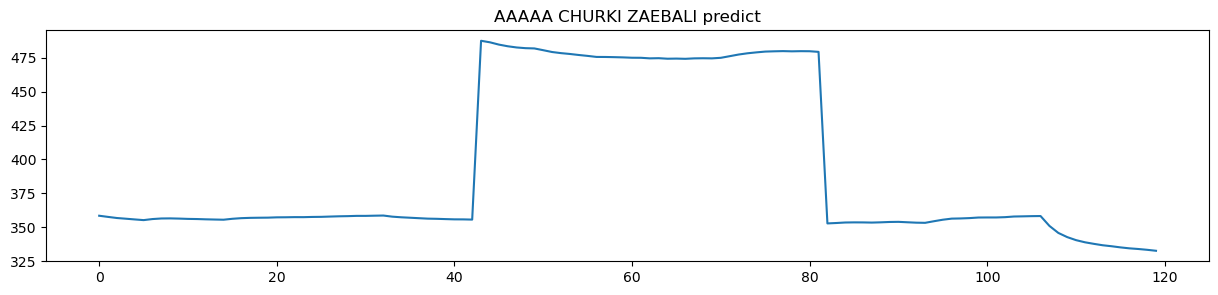

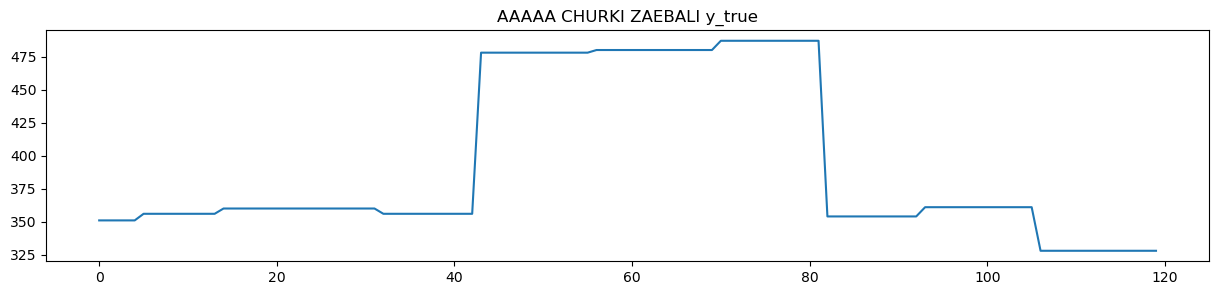

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize =(15, 3))
sns.lineplot(data=preds)
plt.title('AAAAA CHURKI ZAEBALI predict')

plt.figure(figsize =(15, 3))
sns.lineplot(data=y_val)
plt.title('AAAAA CHURKI ZAEBALI y_true')

In [257]:
# pytorch model, second df row, forecast horizon
def predict_step_by_step(model, row, days):
    forecasting_for_days = []
    new_arr_to_predict = row.to_numpy().tolist()
    for i in range(days):
        tensor_to_predict = torch.Tensor(new_arr_to_predict).type(torch.FloatTensor).to(device)
        with torch.no_grad():
            predict = model(tensor_to_predict).cpu().detach().numpy().tolist()[0][0]
            forecasting_for_days.append(predict)
            new_arr_to_predict = [new_arr_to_predict[0][:-1]]
            new_arr_to_predict[0].insert(0, forecasting_for_days[-1])
    
    return forecasting_for_days


#df on 120 cols of lags 
forecast = predict_step_by_step(model, data_to_test_df.tail(1), 120)
#hochu lizat pizdu...

In [258]:
def plot_results(actual_time_series, predicted_values, len_train_data, y_name = 'Parameter'):
    plt.plot(np.arange(0, len(actual_time_series)), 
             actual_time_series, label = 'Actual values', c = 'green')
    plt.plot(np.arange(len_train_data, len_train_data + len(predicted_values)), 
             predicted_values, label = 'Predicted', c = 'blue')
    # Plot black line which divide our array into train and test
    plt.plot([len_train_data, len_train_data],
             [min(actual_time_series), max(actual_time_series)], c = 'black', linewidth = 1)
    plt.ylabel(y_name, fontsize = 15)
    plt.xlabel('Time index', fontsize = 15)
    plt.legend(fontsize = 15, loc='upper left')
    plt.grid()
    plt.show()

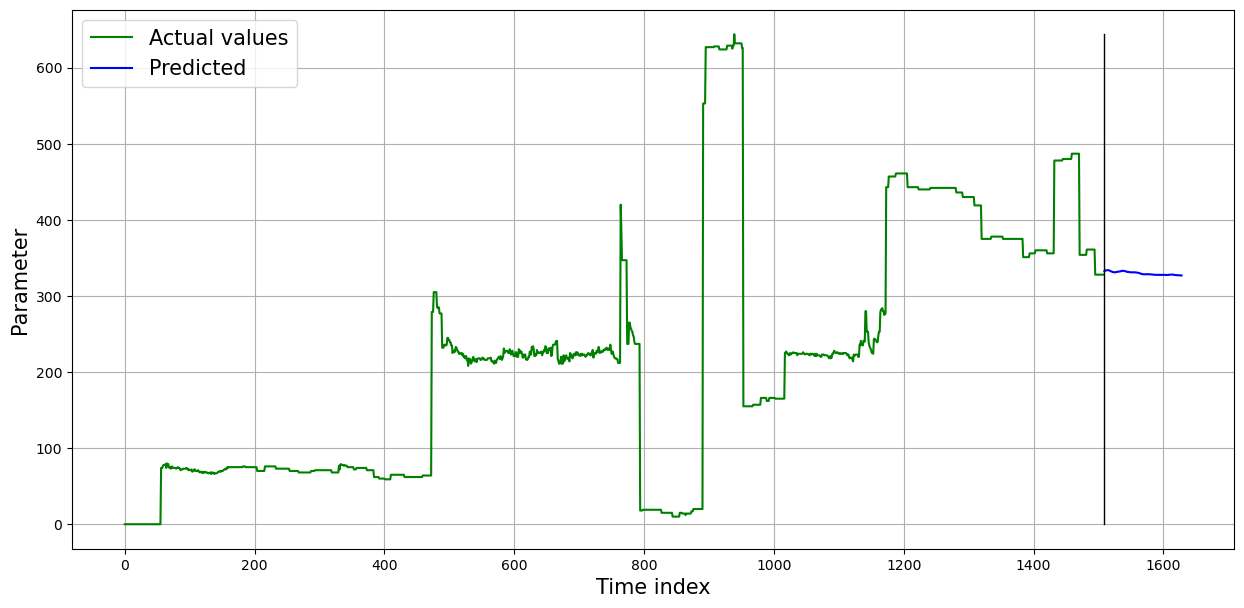

In [260]:
plot_results(actual_time_series = train_with_lags[140000:]['LIQ_RATE'],
             predicted_values = forecast, 
             len_train_data = len(train_with_lags[140000:]))